### Import the Libaries


In [47]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import plotly.express as px
import plotly.graph_objects as go

# Preprocessing and feature scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Clustering algorithms
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

# Evaluation metrics
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from yellowbrick.cluster import SilhouetteVisualizer

# Statistical analysis
from scipy import stats
from scipy.cluster.hierarchy import fcluster

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

### LOAD DATA

In [48]:
data = pd.read_csv('/content/ML_spotify_data.csv')
data.head()

,name,artists,popularity,danceability,valence,energy,explicit,key,liveness,loudness,speechiness,tempo
0,We're For The Dark - Remastered 2010,['Badfinger'],22,0.678,0.559,0.432,0,3,0.0727,-12.696,0.0334,117.674
1,Sixty Years On - Piano Demo,['Elton John'],25,0.456,0.259,0.368,0,6,0.1560,-10.692,0.0280,143.783
2,Got to Find Another Way,['The Guess Who'],21,0.433,0.833,0.724,0,0,0.1700,-9.803,0.0378,84.341
3,Feelin' Alright - Live At The Fillmore East/1970,['Joe Cocker'],22,0.436,0.870,0.914,0,5,0.8550,-6.955,0.0610,174.005
4,Caravan - Take 7,['Van Morrison'],23,0.669,0.564,0.412,0,7,0.4010,-13.095,0.0679,78.716


### EDA

In [49]:
def initial_data_exploration(df):
    """Perform initial data exploration"""
    print("=== DATASET OVERVIEW ===")
    print(f"Dataset shape: {data.shape}")

    print("\n=== COLUMN INFORMATION ===")
    print(data.info())

    print("\n=== BASIC STATISTICS ===")
    display(data.describe())

    print("\n=== MISSING VALUES ===")
    missing_values = data.isnull().sum()
    print(missing_values[missing_values > 0])

    print("\n=== DUPLICATE ROWS ===")
    print(f"Number of duplicate rows: {data.duplicated().sum()}")

    print("\n=== UNIQUE VALUES ===")
    for col in data.columns:
        print(f"{col}: {data[col].nunique()}")

  # Run initial exploration
initial_data_exploration(data)

=== DATASET OVERVIEW ===
Dataset shape: (10000, 12)

=== COLUMN INFORMATION ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          10000 non-null  object 
 1   artists       10000 non-null  object 
 2   popularity    10000 non-null  int64  
 3   danceability  10000 non-null  float64
 4   valence       10000 non-null  float64
 5   energy        10000 non-null  float64
 6   explicit      10000 non-null  int64  
 7   key           10000 non-null  int64  
 8   liveness      10000 non-null  float64
 9   loudness      10000 non-null  float64
 10  speechiness   10000 non-null  float64
 11  tempo         10000 non-null  float64
dtypes: float64(7), int64(3), object(2)
memory usage: 937.6+ KB
None

=== BASIC STATISTICS ===


,popularity,danceability,valence,energy,explicit,key,liveness,loudness,speechiness,tempo
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,37.556800,0.549507,0.523148,0.592609,0.103200,5.20560,0.209787,-9.822324,0.081426,120.179723
std,12.559743,0.178097,0.261456,0.251808,0.304235,3.56205,0.193693,5.321064,0.100472,30.260748
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-60.000000,0.000000,0.000000
25%,27.000000,0.430000,0.313000,0.414000,0.000000,2.00000,0.093900,-12.347250,0.034200,96.191250
50%,36.000000,0.557000,0.524500,0.616000,0.000000,5.00000,0.129000,-8.762000,0.045100,118.330500
75%,46.000000,0.681000,0.742000,0.801000,0.000000,9.00000,0.261250,-6.070750,0.077400,139.609500
max,86.000000,0.986000,0.996000,1.000000,1.000000,11.00000,1.000000,1.073000,0.957000,224.437000



=== MISSING VALUES ===
Series([], dtype: int64)

=== DUPLICATE ROWS ===
Number of duplicate rows: 1

=== UNIQUE VALUES ===
name: 9711
artists: 5723
popularity: 68
danceability: 903
valence: 1225
energy: 1216
explicit: 2
key: 12
liveness: 1453
loudness: 7405
speechiness: 1171
tempo: 9370


### Insights on Analysis
1. We have 12 columns and 10000 rows
2. No missing values
3. We have 1 duplicated row

### Data Preprocessing

In [50]:
# Remove Duplicates
data = data.drop_duplicates()

data.shape

(9999, 12)

### Feature Transformation

In [51]:
# Select relevant audio features for clustering
features = ['danceability', 'energy', 'loudness', 'speechiness',
            'liveness', 'valence', 'tempo']
data_selected = data[features].copy()

In [52]:
# feature scaling to [0,1] range
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_selected)

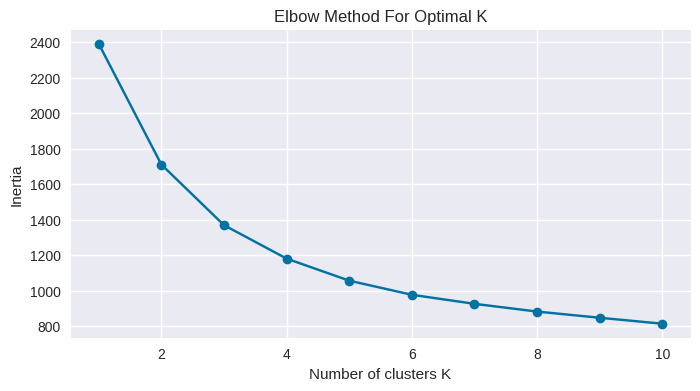

In [53]:
# Find optimal K using Elbow Method
inertia = []
K_range = range(1, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(data_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8,4))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters K')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()

### Insights
- Our K will be 4 clusters

In [54]:
# fit KMeans
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

In [55]:
data['cluster'] = clusters

In [56]:
# The 4 clusters for Kmeans
#plt.figure(figsize=(10, 6))
#sns.scatterplot(x='danceability', y='energy', hue='cluster', data=data, palette='Set1')
#plt.title('K-Means Clustering')

In [57]:
# fit Hierarchical clustering, DBSCAN and GMM models and evaluate using dendogram
data_scaled_df = pd.DataFrame(data_scaled, columns=features)
data_scaled_df['cluster'] = clusters

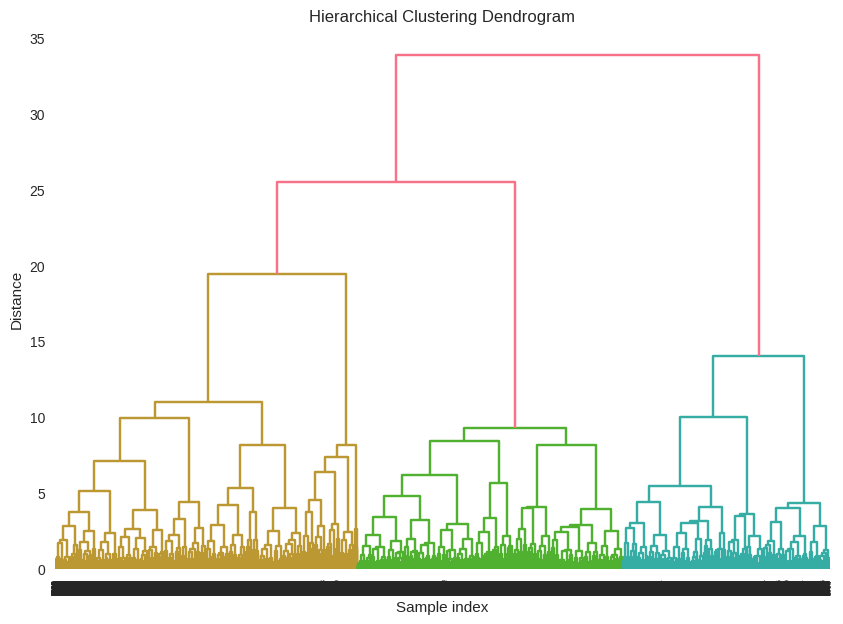

In [58]:
# Fit Hierarchical Clustering
linked = linkage(data_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

In [59]:
# Fit DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(data_scaled)

In [60]:
# Fit Gaussian Mixture Method (GMM)
gmm = GaussianMixture(n_components=k, random_state=42)
gmm_clusters = gmm.fit_predict(data_scaled)

### Visualization

In [61]:
# PCA for 2D Visualization
pca = PCA(n_components=2, random_state=42)
data_pca = pca.fit_transform(data_scaled)

data['pca1'] = data_pca[:, 0]
data['pca2'] = data_pca[:, 1]

#plt.figure(figsize=(10, 6))

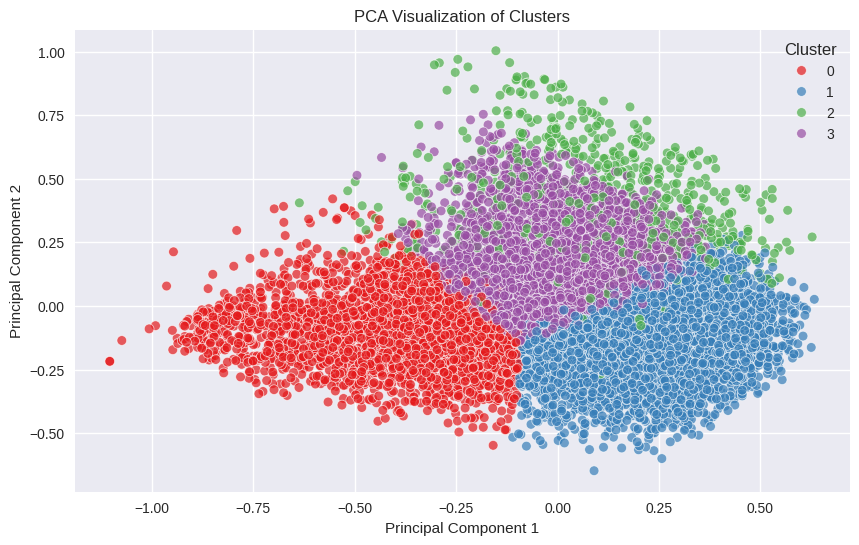

In [66]:
# Plot clusters in PCA space
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=data, palette='Set1', alpha=0.7)
plt.title('PCA Visualization of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [63]:
print("\nCluster counts:")
print(data['cluster'].value_counts())


Cluster counts:
cluster
1    4009
3    2656
0    2538
2     796
Name: count, dtype: int64


In [64]:
# Average audio features per cluster
cluster_summary = data.groupby('cluster')[features].mean()
print("\nAverage audio features per cluster:\n", cluster_summary)


Average audio features per cluster:
          danceability    energy   loudness  speechiness  liveness   valence  \
cluster                                                                       
0            0.449590  0.276263 -14.893936     0.049164  0.149478  0.273746   
1            0.667368  0.644393  -8.825633     0.086199  0.157597  0.769911   
2            0.485249  0.720595  -8.974131     0.140269  0.749307  0.508621   
3            0.486324  0.778316  -6.735031     0.087434  0.184244  0.393281   

              tempo  
cluster              
0        109.901615  
1        120.752417  
2        123.224582  
3        128.222939  


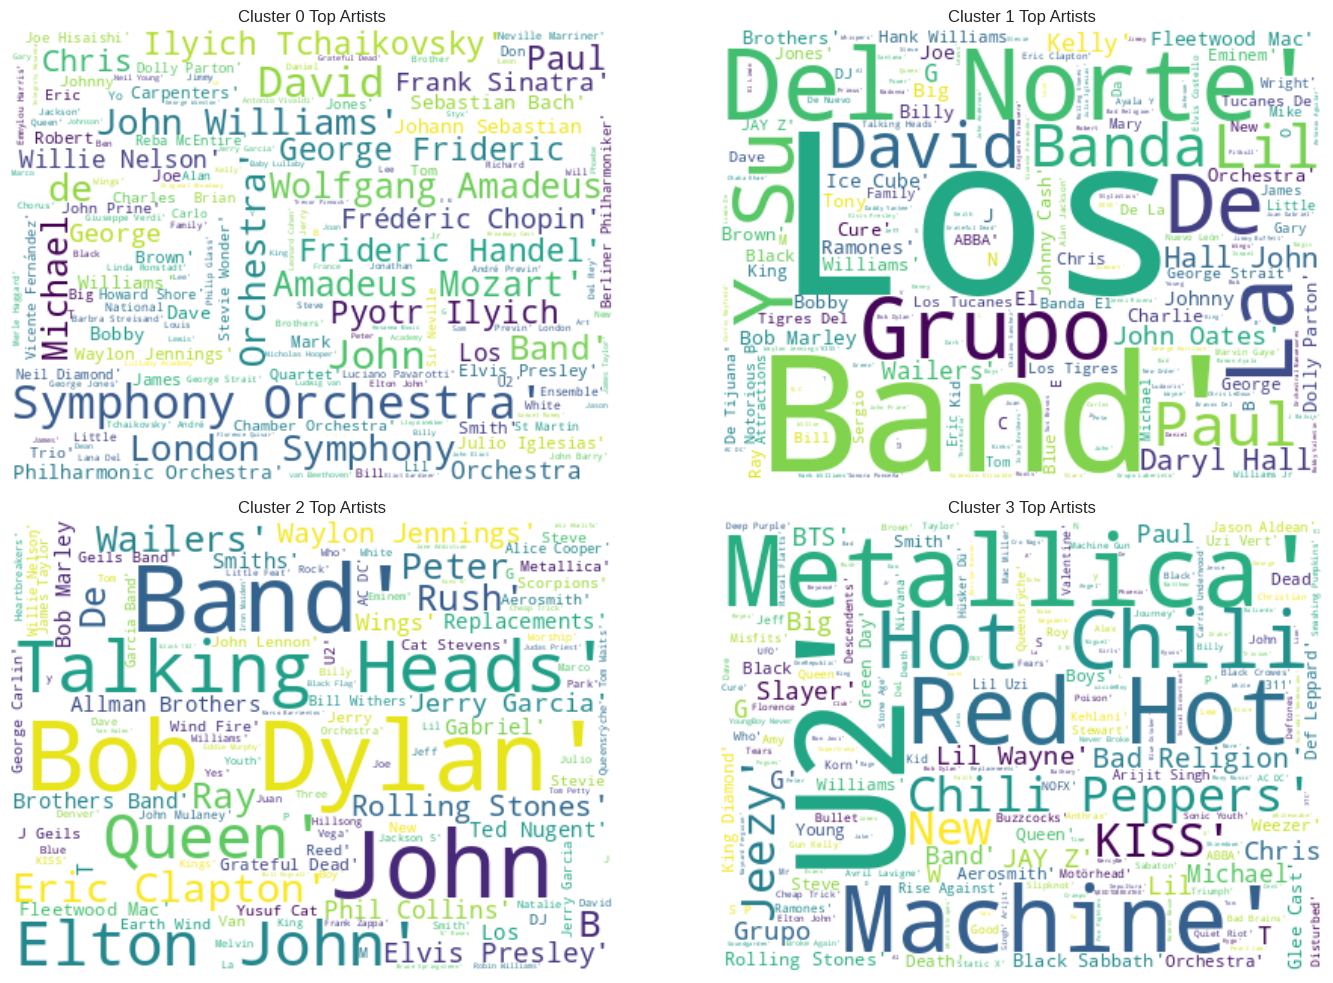

In [65]:
# Word clouds for top artists in each cluster
from wordcloud import WordCloud

plt.figure(figsize=(15, 10))
for cluster_num in range(k):
    plt.subplot(2, 2, cluster_num+1)
    artists = data[data['cluster'] == cluster_num]['artists'].dropna()
    text = " ".join(artists)
    wordcloud = WordCloud(width=400, height=300, background_color='white').generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Cluster {cluster_num} Top Artists')
plt.tight_layout()
plt.show()